In [4]:
#Setup
import numpy as np
from pylab import *
from scipy import signal
from scipy import interpolate
from scipy import integrate
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.lines import Line2D
import pandas as pd
import os
import sys
import configparser
import codecs
import csv
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

mpl.rcParams['agg.path.chunksize'] = 100000

In [5]:
#Setup (Visual)
import seaborn as sns
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 1.5})
sns.set_style('whitegrid')

plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams['figure.facecolor'] = 'white'

In [6]:
#csv data読み込み用
def xls_df(file_name,sheet):
    return pd.read_excel(file_name, sheet_name=sheet, header=0, skiprows = range(1, 2), index_col=False)

def plotflow(file_name,sheet):
    df=xls_df(file_name,sheet)
    Time=df['TIME']
    FlowC=df['W_C']
    PRT=df['PRT T_S']
    FlowT=df['WTC']
    T1t=df['TT1Tc']
    T1tA=df['TT1TA']
    T1tB=df['TT1TB']
    P1c=df['PS1C']
    P2c=df['PS2C']
    P1t=df['PS1T']
    P2t=df['PS2T']
    rpm=df['Turbo Speed 1']*60
    deltaP=P1t-P2c
    deltalimitrpm=([120000,213000])
    deltalimitkpa=([190,300])
    
    #Results
    fig1,ax1=plt.subplots(2,2)
    ax1[0,0].set_ylabel('Corrected Turbine Flow [kg/s]')
    ax1[0,0].set_xlabel('PRT [-]')
    ax1[0,0].plot(PRT,FlowT,label='Turbine')
    #plt.plot(PRT,FlowC,label='Compressor')
    ax1[0,0].legend()
   
    ax1[0,1].set_ylabel('Turbo rpm [kg/s]')
    ax1[0,1].set_xlabel('PRT [-]')
    ax1[0,1].plot(PRT,rpm)
    
    ax1[1,0].set_ylabel('T1t [degC]')
    ax1[1,0].set_xlabel('PRT [-]')
    ax1[1,0].plot(PRT,T1t)
    ax1[1,0].plot(PRT,T1tA)
    ax1[1,0].plot(PRT,T1tB)
    
    ax1[1,1].set_xlabel('Turbo rpm [rpm]')
    ax1[1,1].set_ylabel('Pressure [kPaG]')
    ax1[1,1].plot(rpm,P1t,label='P1t')
    ax1[1,1].plot(rpm,P1c,label='P1c')
    ax1[1,1].plot(rpm,P2c,label='P2c')
    ax1[1,1].plot(rpm,P2t,label='P2t')
    ax1[1,1].plot(rpm,deltaP,label='deltaP')
    ax1[1,1].plot(deltalimitrpm,deltalimitkpa,label='deltaPlimit',linestyle='dotted')            
    ax1[1,1].legend()
    
    plt.suptitle(file_name)
    fig1.tight_layout()
    plt.savefig(file_name + 'TurbineFlow.jpg', dpi=300)
    plt.show()

    #For Data check
    fig11,ax11=plt.subplots(2,2)
    ax11[0,0].set_ylabel('Turbo rpm [rpm]')
    ax11[0,0].set_xlabel('Time')
    ax11[0,0].plot(Time,rpm)
    
    ax11[0,1].set_ylabel('PRT[-]')
    ax11[0,1].set_xlabel('Time')
    ax11[0,1].plot(Time,PRT)
    
    ax11[1,0].set_ylabel('PRT[-]')
    ax11[1,0].set_xlabel('Time')
    ax11[1,0].plot(Time,T1t)
    ax11[1,0].plot(Time,T1tA)
    ax11[1,0].plot(Time,T1tB)
    
    ax11[1,1].set_xlabel('Time')
    ax11[1,1].set_ylabel('Pressure [kPaG]')
    ax11[1,1].plot(Time,P1t,label='P1t')
    ax11[1,1].plot(Time,P1c,label='P1c')
    ax11[1,1].plot(Time,P2c,label='P2c')
    ax11[1,1].plot(Time,P2t,label='P2t')
    ax11[1,1].legend()
    
    plt.suptitle(file_name)
    #fig11.tight_layout()
    plt.show

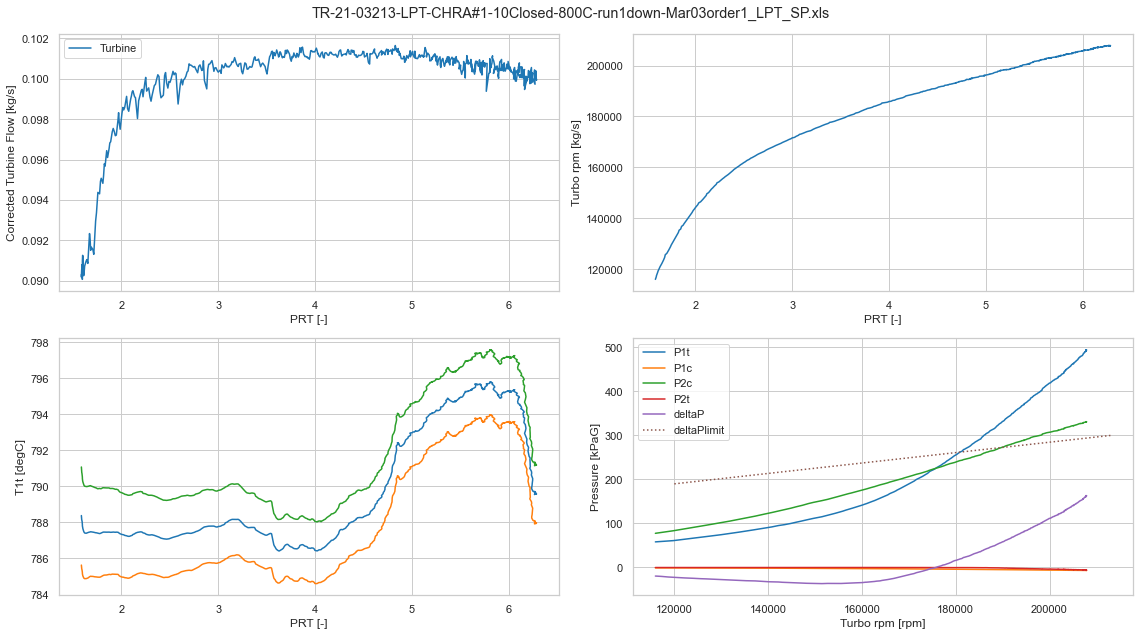

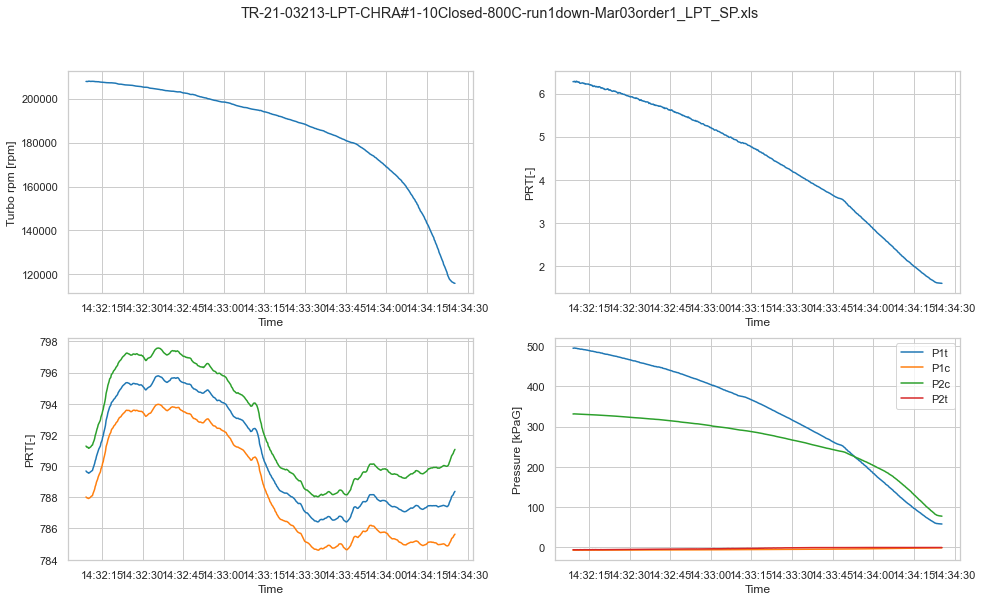

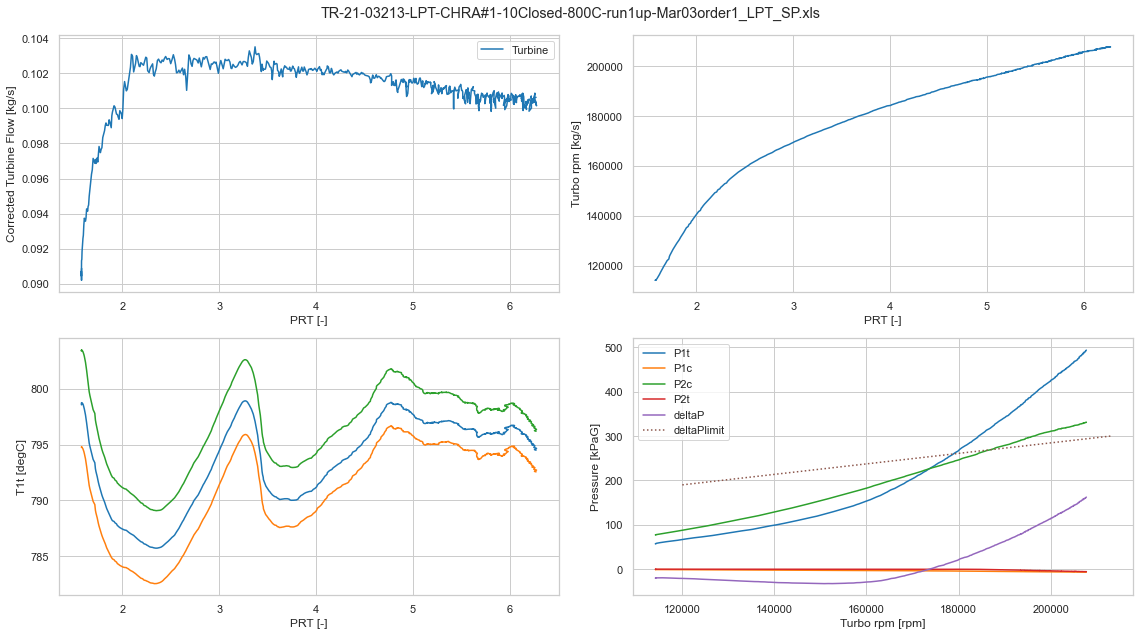

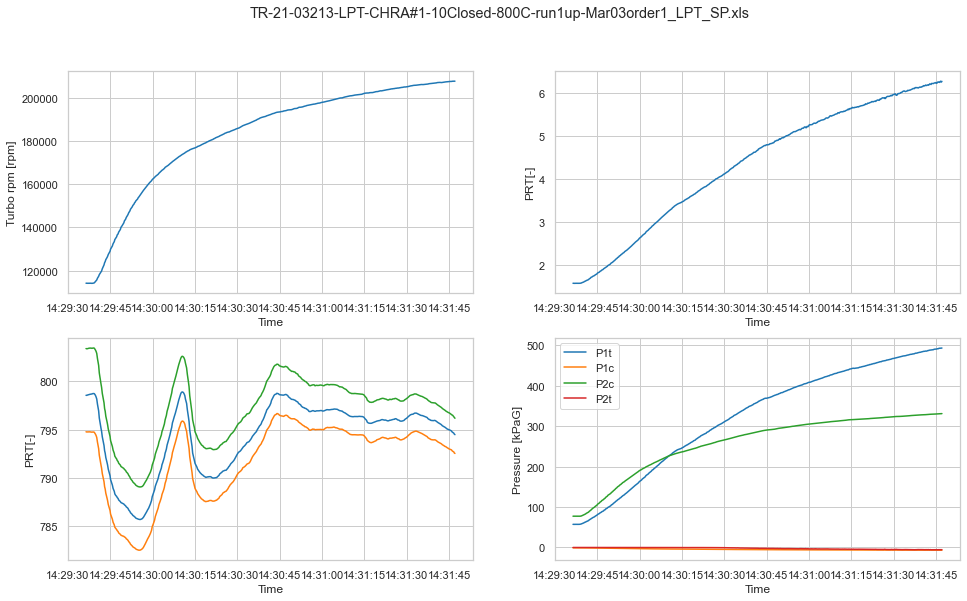

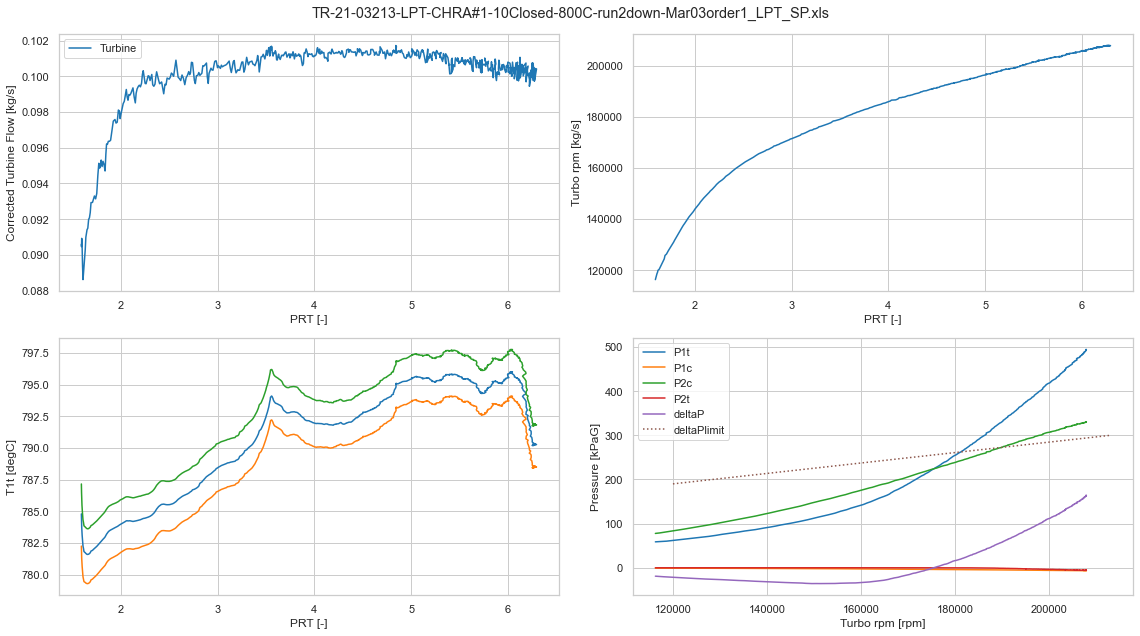

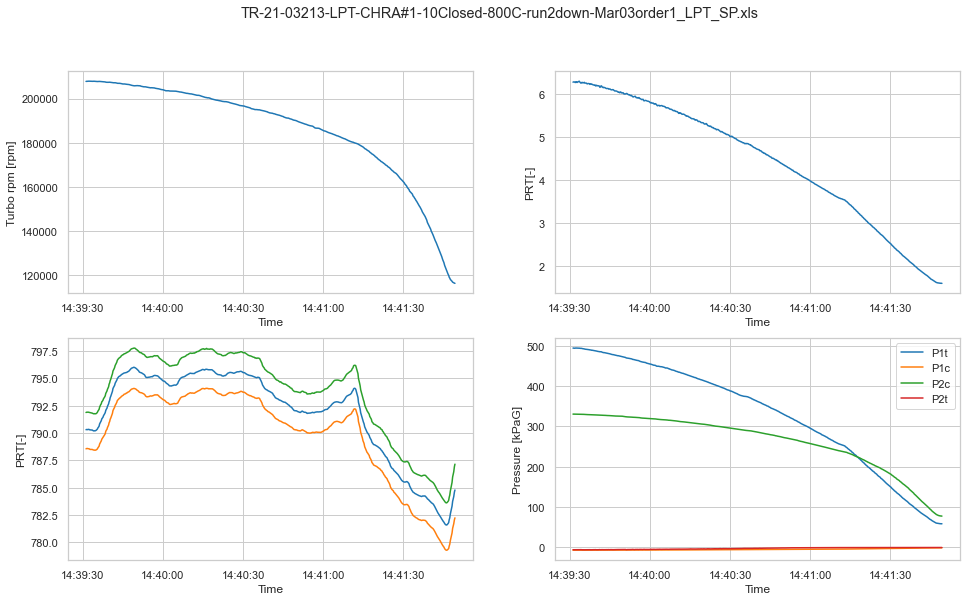

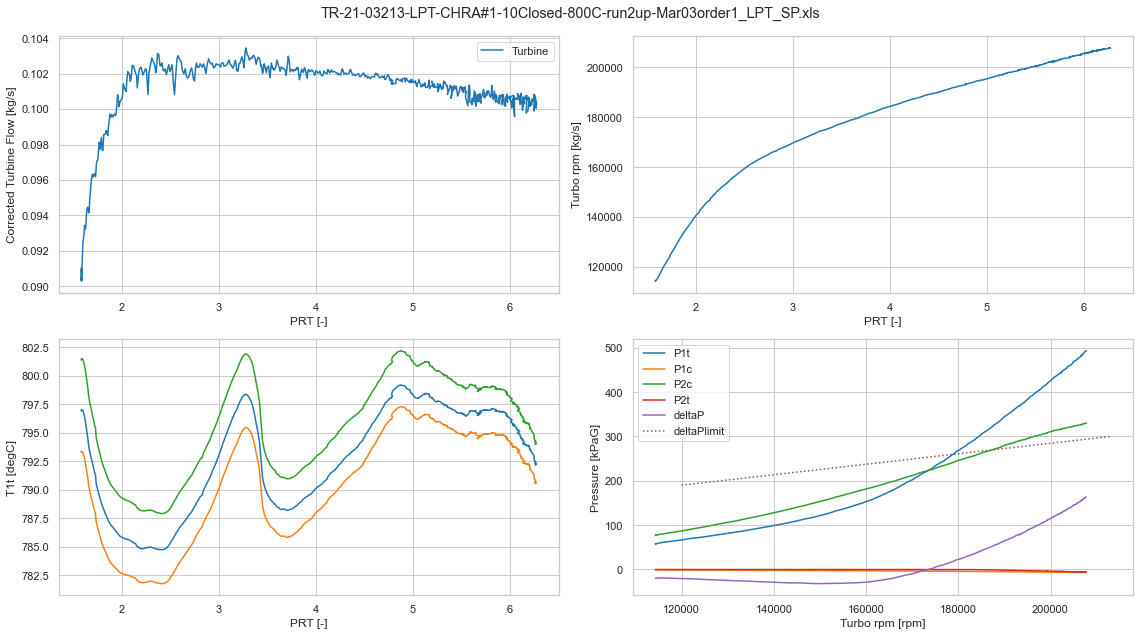

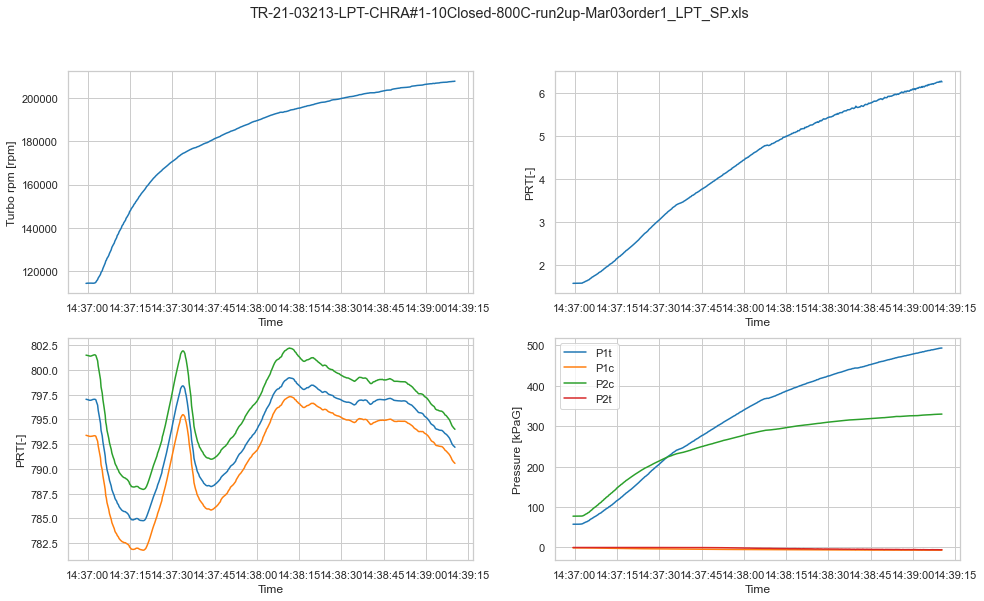

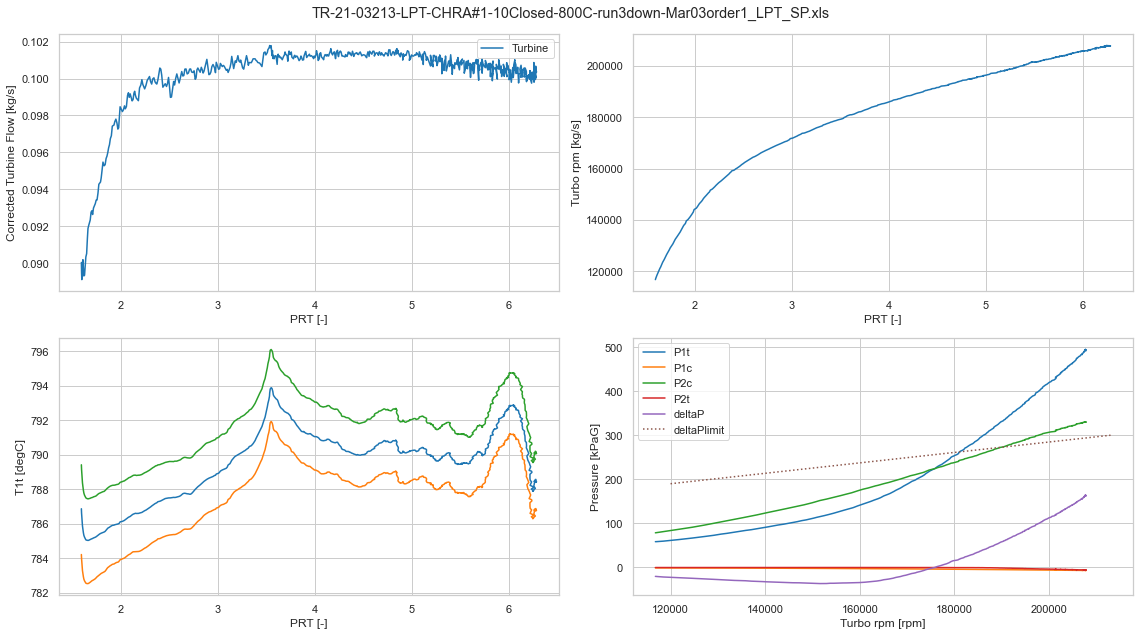

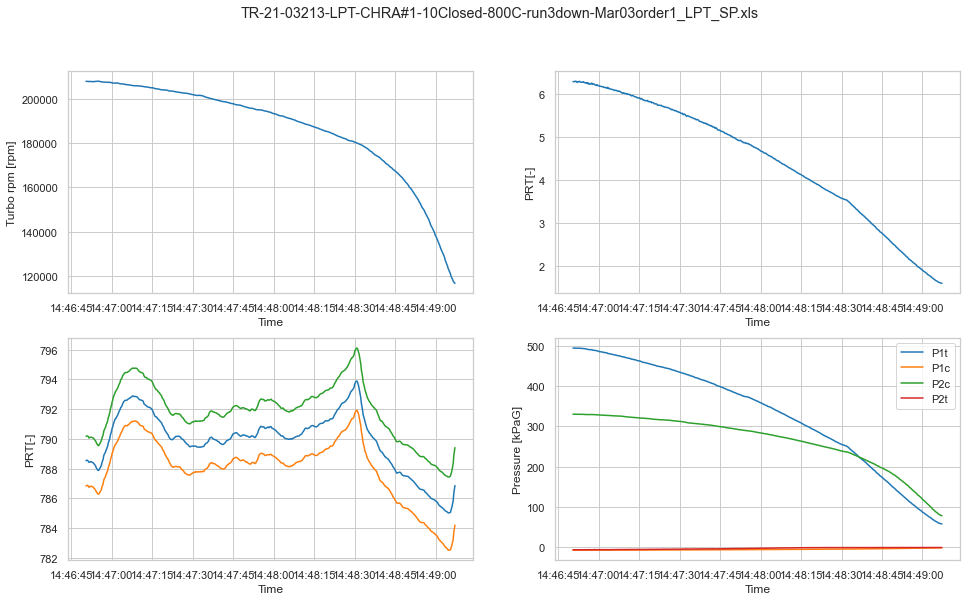

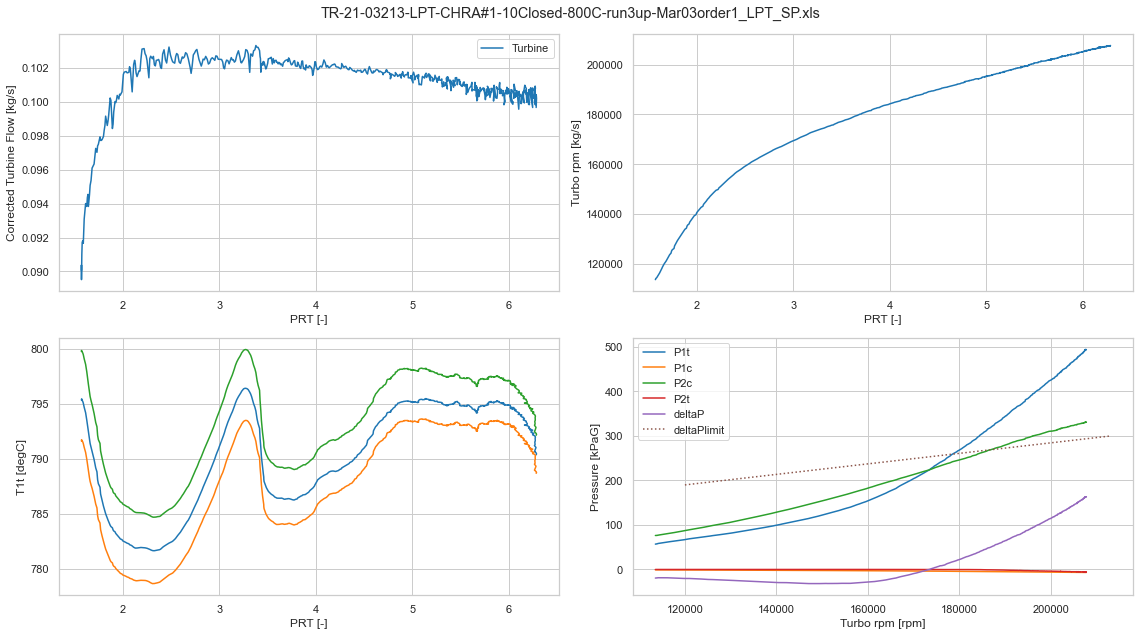

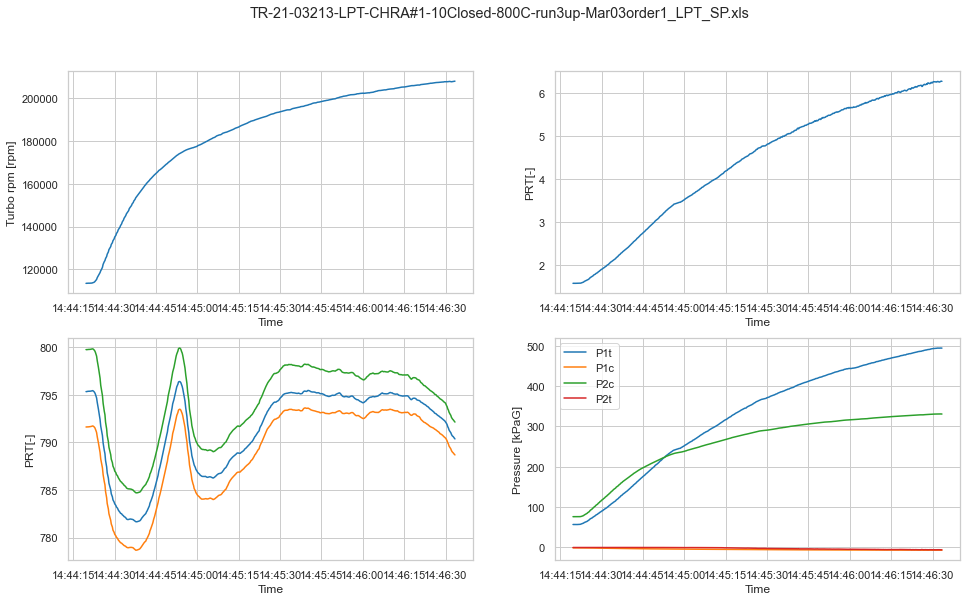

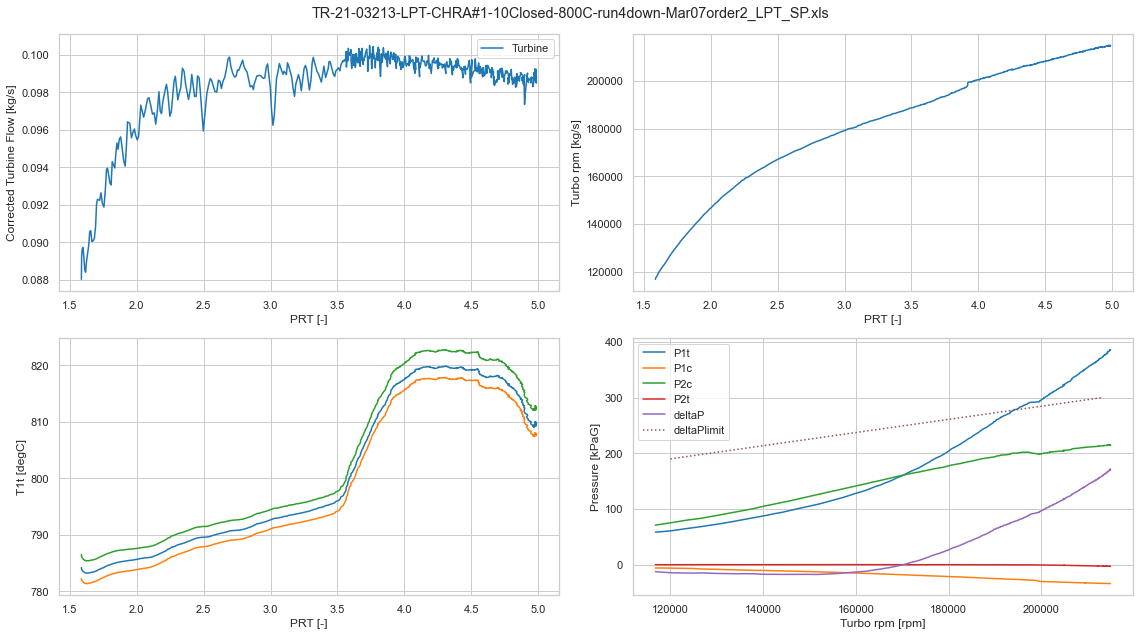

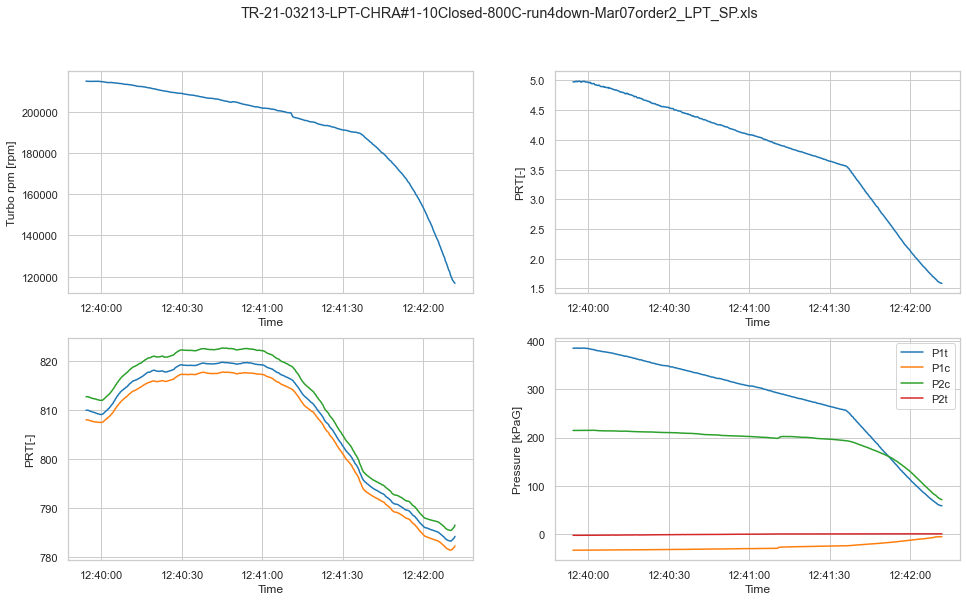

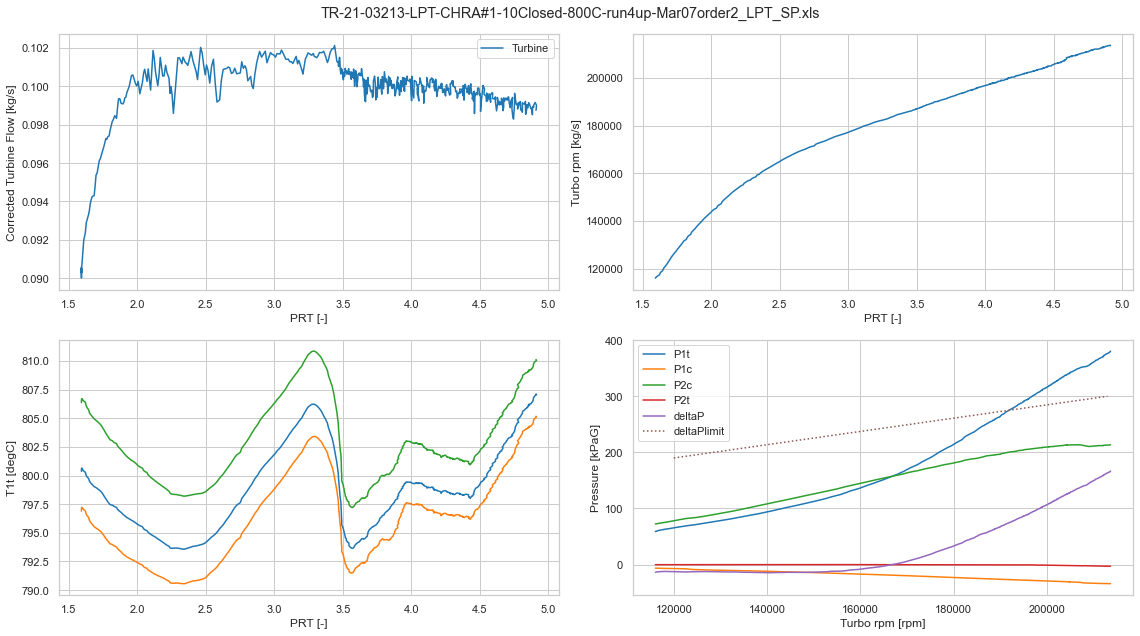

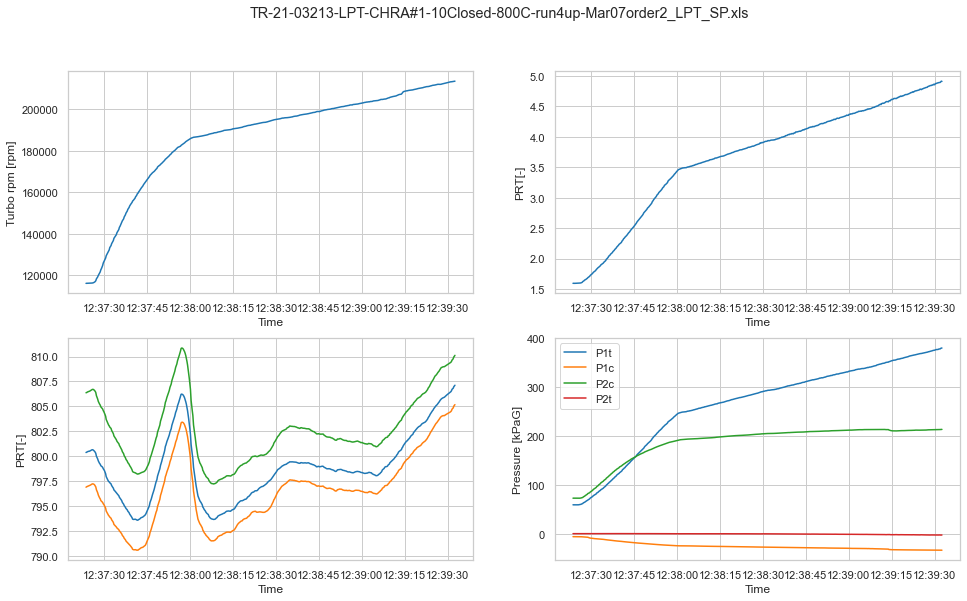

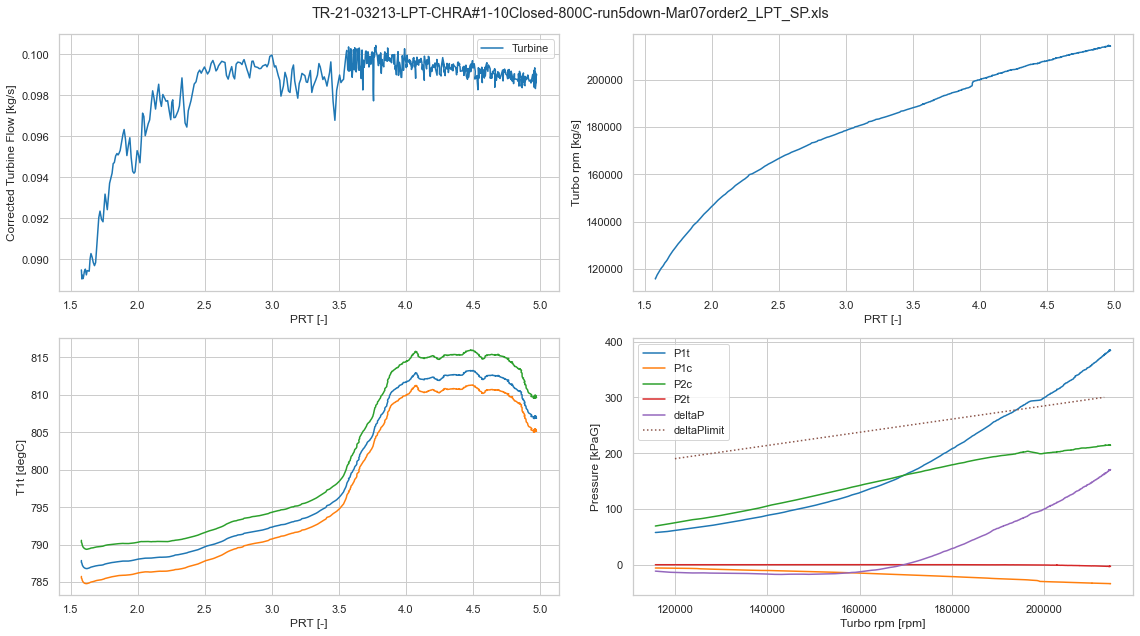

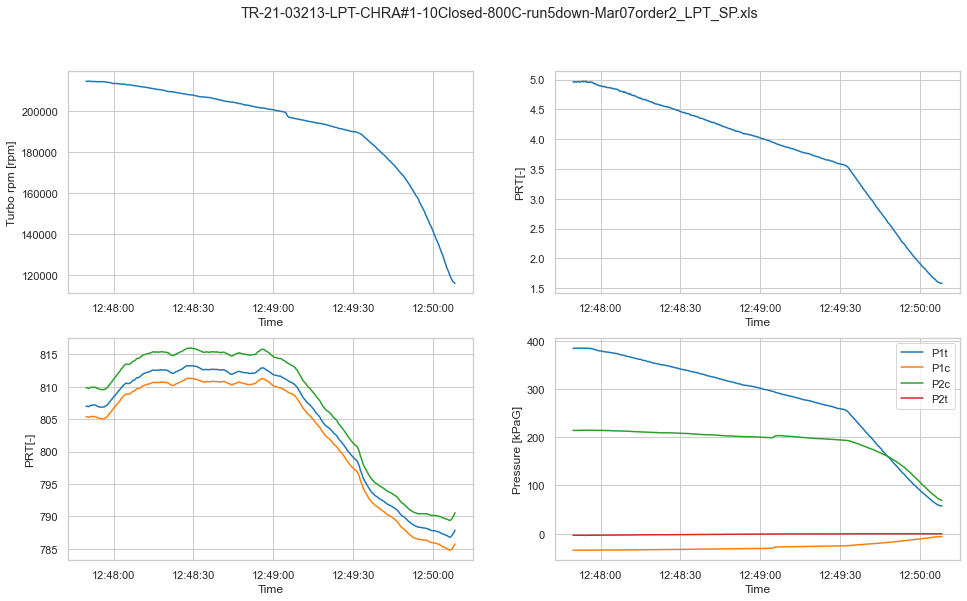

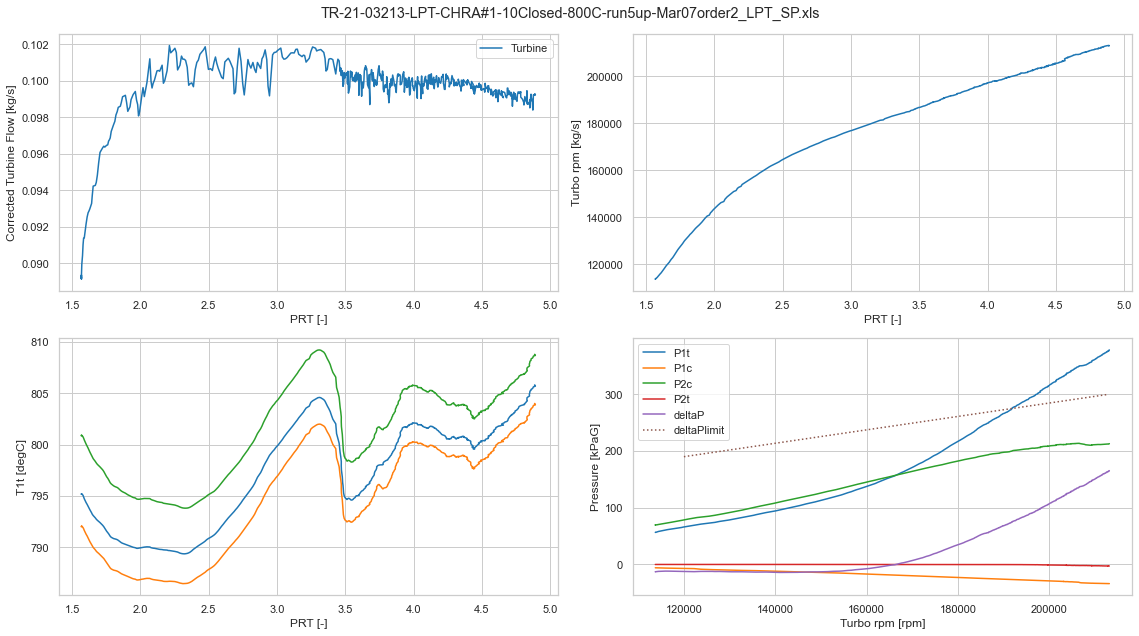

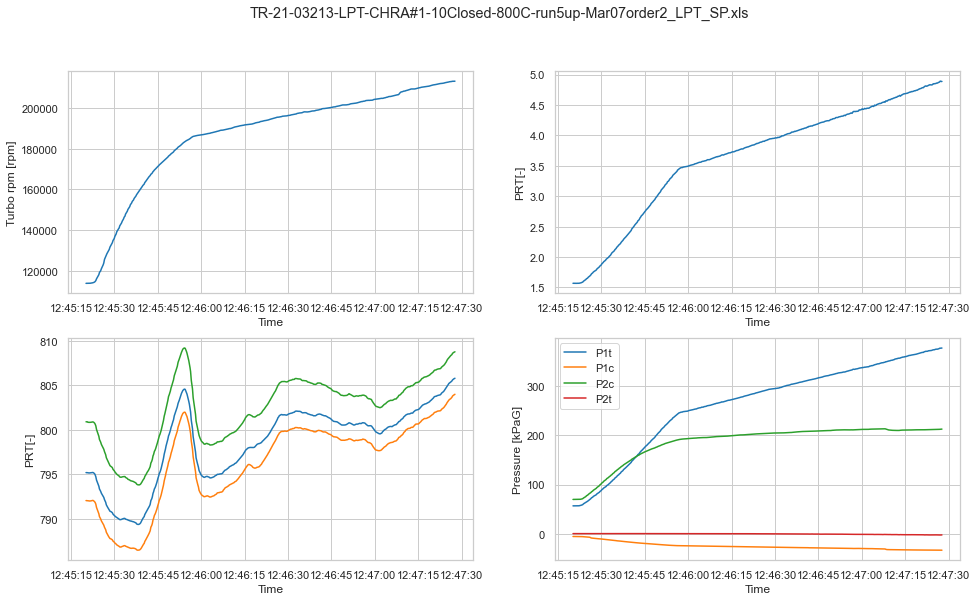

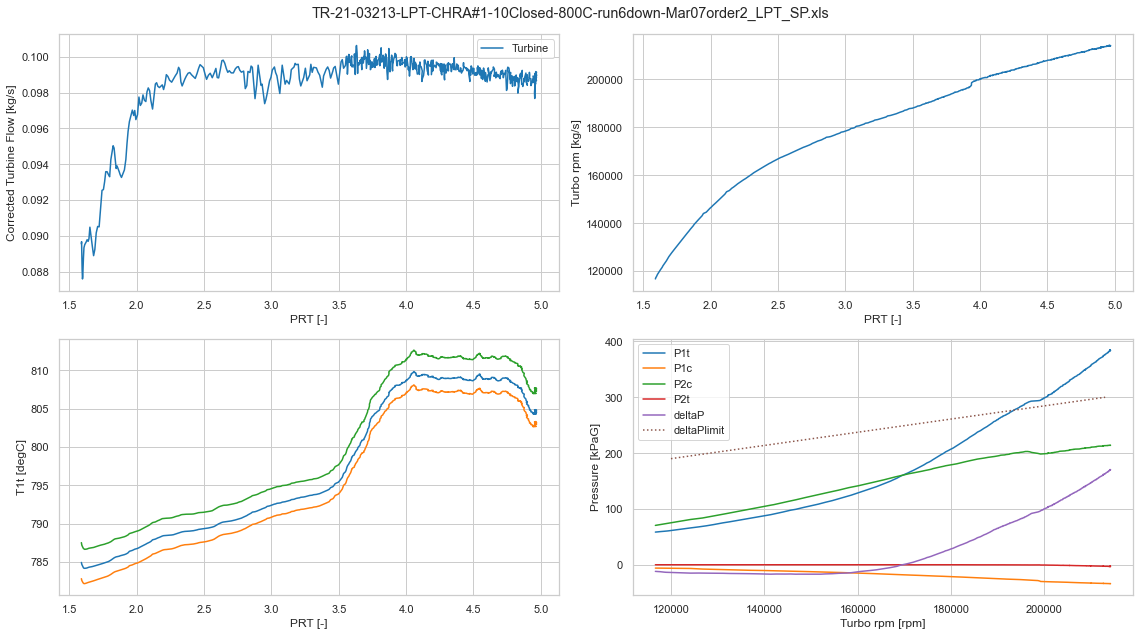

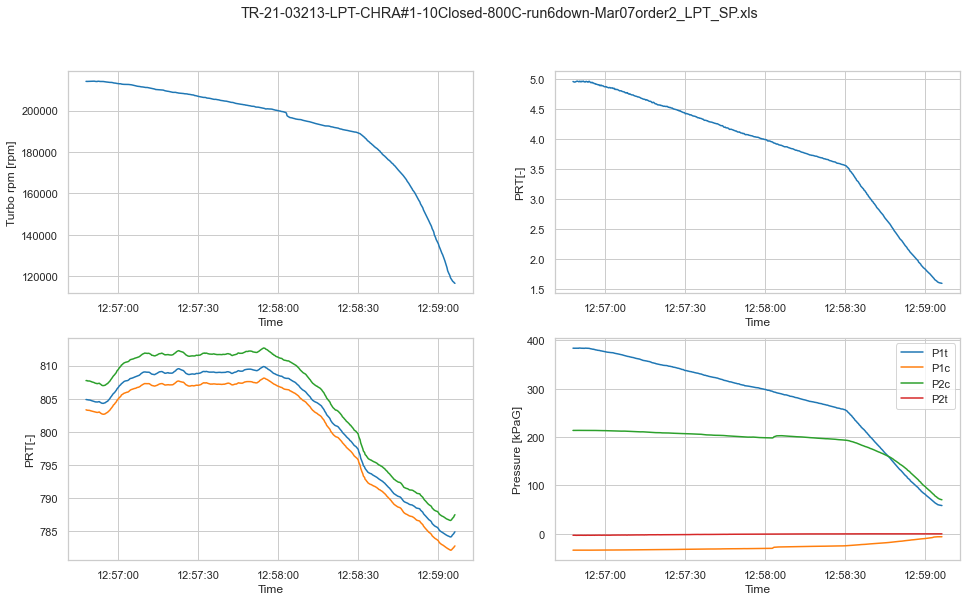

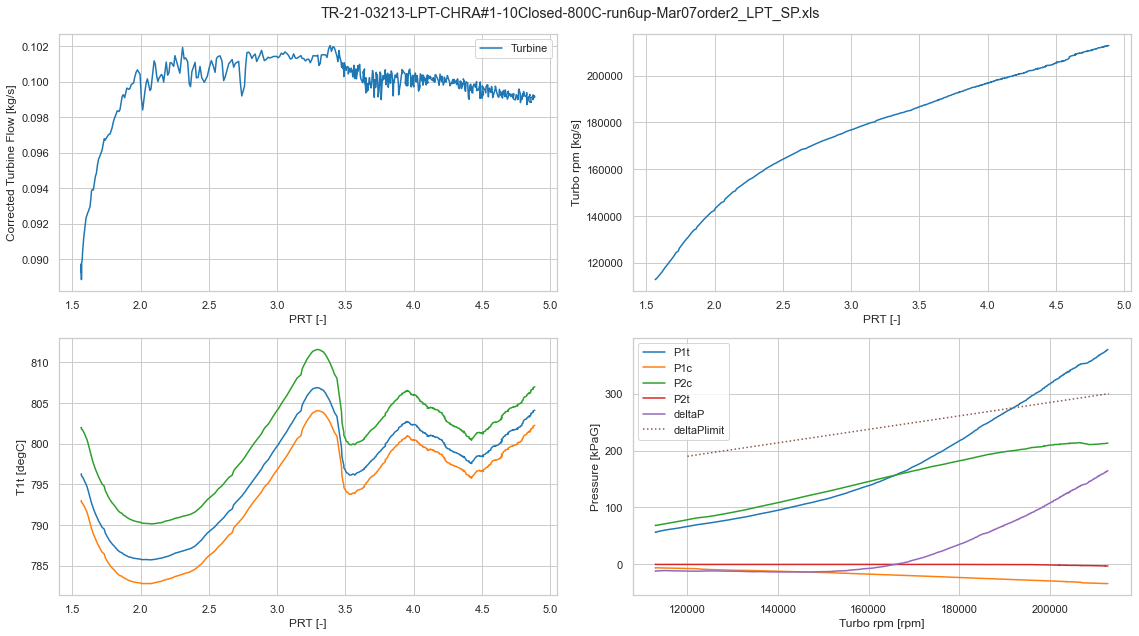

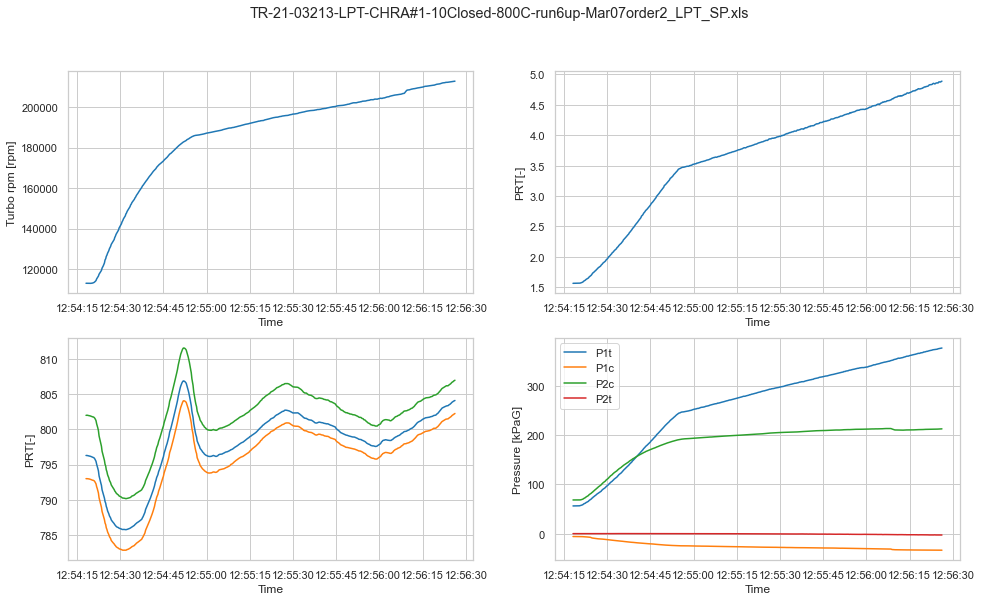

In [7]:
plotflow("TR-21-03213-LPT-CHRA#1-10Closed-800C-run1down-Mar03order1_LPT_SP.xls","TR-21-03213-LPT-CHRA#1-10Closed")
plotflow("TR-21-03213-LPT-CHRA#1-10Closed-800C-run1up-Mar03order1_LPT_SP.xls","TR-21-03213-LPT-CHRA#1-10Closed")
plotflow("TR-21-03213-LPT-CHRA#1-10Closed-800C-run2down-Mar03order1_LPT_SP.xls","TR-21-03213-LPT-CHRA#1-10Closed")
plotflow("TR-21-03213-LPT-CHRA#1-10Closed-800C-run2up-Mar03order1_LPT_SP.xls","TR-21-03213-LPT-CHRA#1-10Closed")
plotflow("TR-21-03213-LPT-CHRA#1-10Closed-800C-run3down-Mar03order1_LPT_SP.xls","TR-21-03213-LPT-CHRA#1-10Closed")
plotflow("TR-21-03213-LPT-CHRA#1-10Closed-800C-run3up-Mar03order1_LPT_SP.xls","TR-21-03213-LPT-CHRA#1-10Closed")
plotflow("TR-21-03213-LPT-CHRA#1-10Closed-800C-run4down-Mar07order2_LPT_SP.xls","TR-21-03213-LPT-CHRA#1-10Closed")
plotflow("TR-21-03213-LPT-CHRA#1-10Closed-800C-run4up-Mar07order2_LPT_SP.xls","TR-21-03213-LPT-CHRA#1-10Closed")
plotflow("TR-21-03213-LPT-CHRA#1-10Closed-800C-run5down-Mar07order2_LPT_SP.xls","TR-21-03213-LPT-CHRA#1-10Closed")
plotflow("TR-21-03213-LPT-CHRA#1-10Closed-800C-run5up-Mar07order2_LPT_SP.xls","TR-21-03213-LPT-CHRA#1-10Closed")
plotflow("TR-21-03213-LPT-CHRA#1-10Closed-800C-run6down-Mar07order2_LPT_SP.xls","TR-21-03213-LPT-CHRA#1-10Closed")
plotflow("TR-21-03213-LPT-CHRA#1-10Closed-800C-run6up-Mar07order2_LPT_SP.xls","TR-21-03213-LPT-CHRA#1-10Closed")

